CREDIT CARD FRAUD ANALYSIS

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial', 'Helvetica', 'Liberation Sans']

# **1.Identifying and sourcing relevant datasets**

In [13]:
try:
    df = pd.read_csv('creditcard.csv')
    print("Dataset loaded successfully!")
    print(f"Initial dataset shape: {df.shape}")
except FileNotFoundError:
    print("Error: 'creditcard.csv' not found. Please upload the dataset to your Colab environment or provide the correct path.")
    # Create a dummy DataFrame for demonstration if file not found
    print("Creating a dummy dataset for demonstration purposes...")
    data = {
        'Time': np.random.randint(0, 172800, 1000),
        'V1': np.random.randn(1000),
        'V2': np.random.randn(1000),
        'V3': np.random.randn(1000),
        'Amount': np.random.uniform(0, 2000, 1000),
        'Class': np.random.choice([0, 1], 1000, p=[0.998, 0.002]) # Highly imbalanced
    }
    df = pd.DataFrame(data)
    print("Dummy dataset created.")
    print(f"Dummy dataset shape: {df.shape}")


Dataset loaded successfully!
Initial dataset shape: (284807, 31)


# **2.Cleaning and handling missing values**

In [14]:
print("--- Missing Values (NaNs) per column ---")
missing_values = df.isnull().sum()
# Display only columns that have missing values
print(missing_values[missing_values > 0].to_markdown())

if missing_values.sum() == 0:
    print("No missing values found in the dataset. The dataset is clean.")
else:
    print("Missing values detected. Further handling strategies (imputation/deletion) would be applied here.")

--- Missing Values (NaNs) per column ---
| 0   |
|-----|
No missing values found in the dataset. The dataset is clean.


3.Feature selection and engineering

In [15]:
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))
print("Engineered 'Hour' feature from 'Time' for pattern analysis.")
features_for_analysis = [col for col in df.columns if col not in ['Class']]
print(f"\nFeatures identified for detailed analysis: {features_for_analysis}")


Engineered 'Hour' feature from 'Time' for pattern analysis.

Features identified for detailed analysis: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Hour']


# **4.Ensuring data integrity and consistency **

In [16]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows found: {num_duplicates}")

if num_duplicates > 0:
    print("Removing duplicate rows to ensure data consistency...")
    df.drop_duplicates(inplace=True)
    print(f"DataFrame shape after removing duplicates: {df.shape}")
else:
    print("No duplicate rows found, data is consistent in this regard.")

# Verify data types of columns to ensure they are appropriate for analysis
print("\n--- Data Types of Columns ---")
print(df.dtypes.to_markdown())

Number of duplicate rows found: 1081
Removing duplicate rows to ensure data consistency...
DataFrame shape after removing duplicates: (283726, 32)

--- Data Types of Columns ---
|        | 0       |
|:-------|:--------|
| Time   | float64 |
| V1     | float64 |
| V2     | float64 |
| V3     | float64 |
| V4     | float64 |
| V5     | float64 |
| V6     | float64 |
| V7     | float64 |
| V8     | float64 |
| V9     | float64 |
| V10    | float64 |
| V11    | float64 |
| V12    | float64 |
| V13    | float64 |
| V14    | float64 |
| V15    | float64 |
| V16    | float64 |
| V17    | float64 |
| V18    | float64 |
| V19    | float64 |
| V20    | float64 |
| V21    | float64 |
| V22    | float64 |
| V23    | float64 |
| V24    | float64 |
| V25    | float64 |
| V26    | float64 |
| V27    | float64 |
| V28    | float64 |
| Amount | float64 |
| Class  | int64   |
| Hour   | float64 |


# **5.Summary statistics and insights **

In [17]:
print("--- First 5 rows of the dataset ---")
print(df.head().to_markdown(index=False))

# Get a concise summary of the DataFrame, including non-null values and data types
print("\n--- DataFrame Info ---")
df.info()

# Get descriptive statistics for numerical columns to understand data distribution
print("\n--- Descriptive Statistics ---")
print(df.describe().to_markdown())

# Check the distribution of the target variable 'Class' to understand class imbalance
print("\n--- Distribution of 'Class' (Fraud vs. Non-Fraud) ---")
class_counts = df['Class'].value_counts()
print(class_counts.to_markdown())

non_fraud_percentage = round(class_counts[0] / len(df) * 100, 2)
fraud_percentage = round(class_counts[1] / len(df) * 100, 2)
print(f"Non-Fraudulent transactions: {non_fraud_percentage}%")
print(f"Fraudulent transactions: {fraud_percentage}%")


--- First 5 rows of the dataset ---
|   Time |        V1 |         V2 |      V3 |        V4 |         V5 |         V6 |        V7 |         V8 |        V9 |        V10 |       V11 |        V12 |       V13 |       V14 |       V15 |       V16 |       V17 |        V18 |       V19 |        V20 |        V21 |        V22 |       V23 |        V24 |       V25 |       V26 |        V27 |        V28 |   Amount |   Class |   Hour |
|-------:|----------:|-----------:|--------:|----------:|-----------:|-----------:|----------:|-----------:|----------:|-----------:|----------:|-----------:|----------:|----------:|----------:|----------:|----------:|-----------:|----------:|-----------:|-----------:|-----------:|----------:|-----------:|----------:|----------:|-----------:|-----------:|---------:|--------:|-------:|
|      0 | -1.35981  | -0.0727812 | 2.53635 |  1.37816  | -0.338321  |  0.462388  |  0.239599 |  0.0986979 |  0.363787 |  0.0907942 | -0.5516   | -0.617801  | -0.99139  | -0.311169 |  1.46

# **6.Identifying patterns, trends, and anomalies**

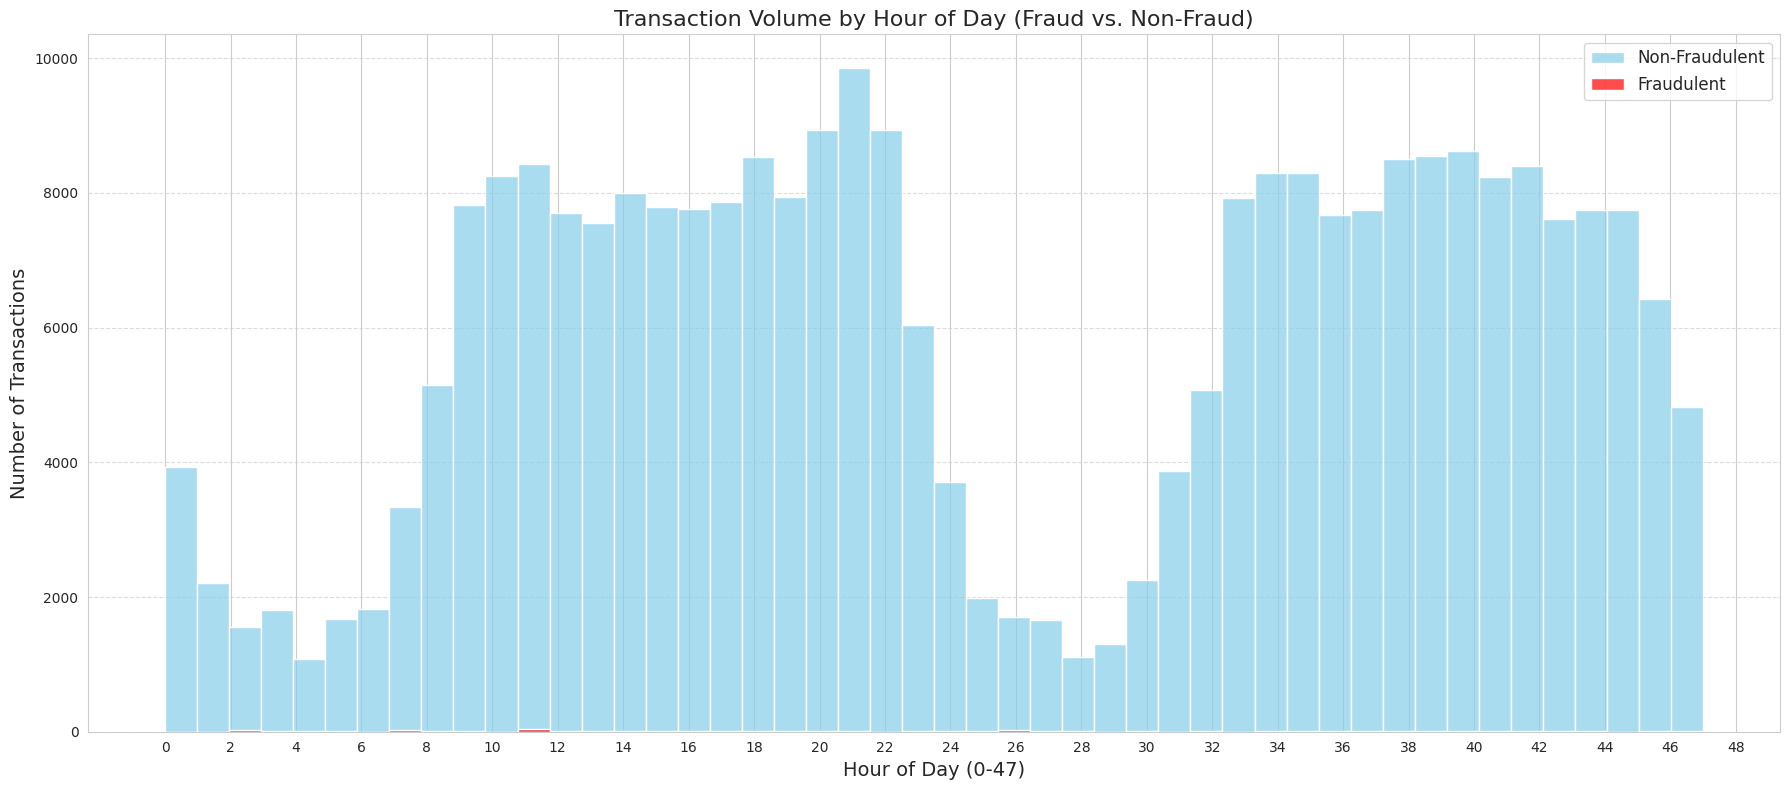

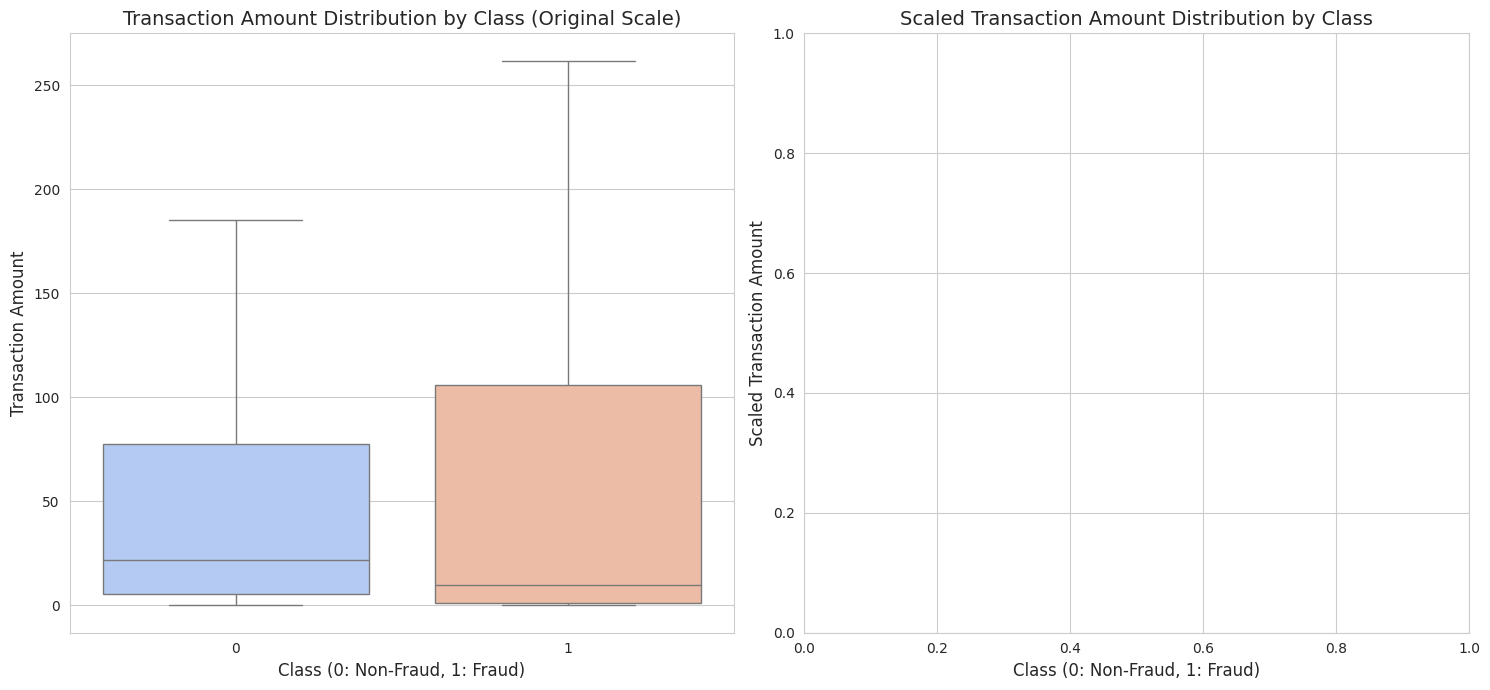

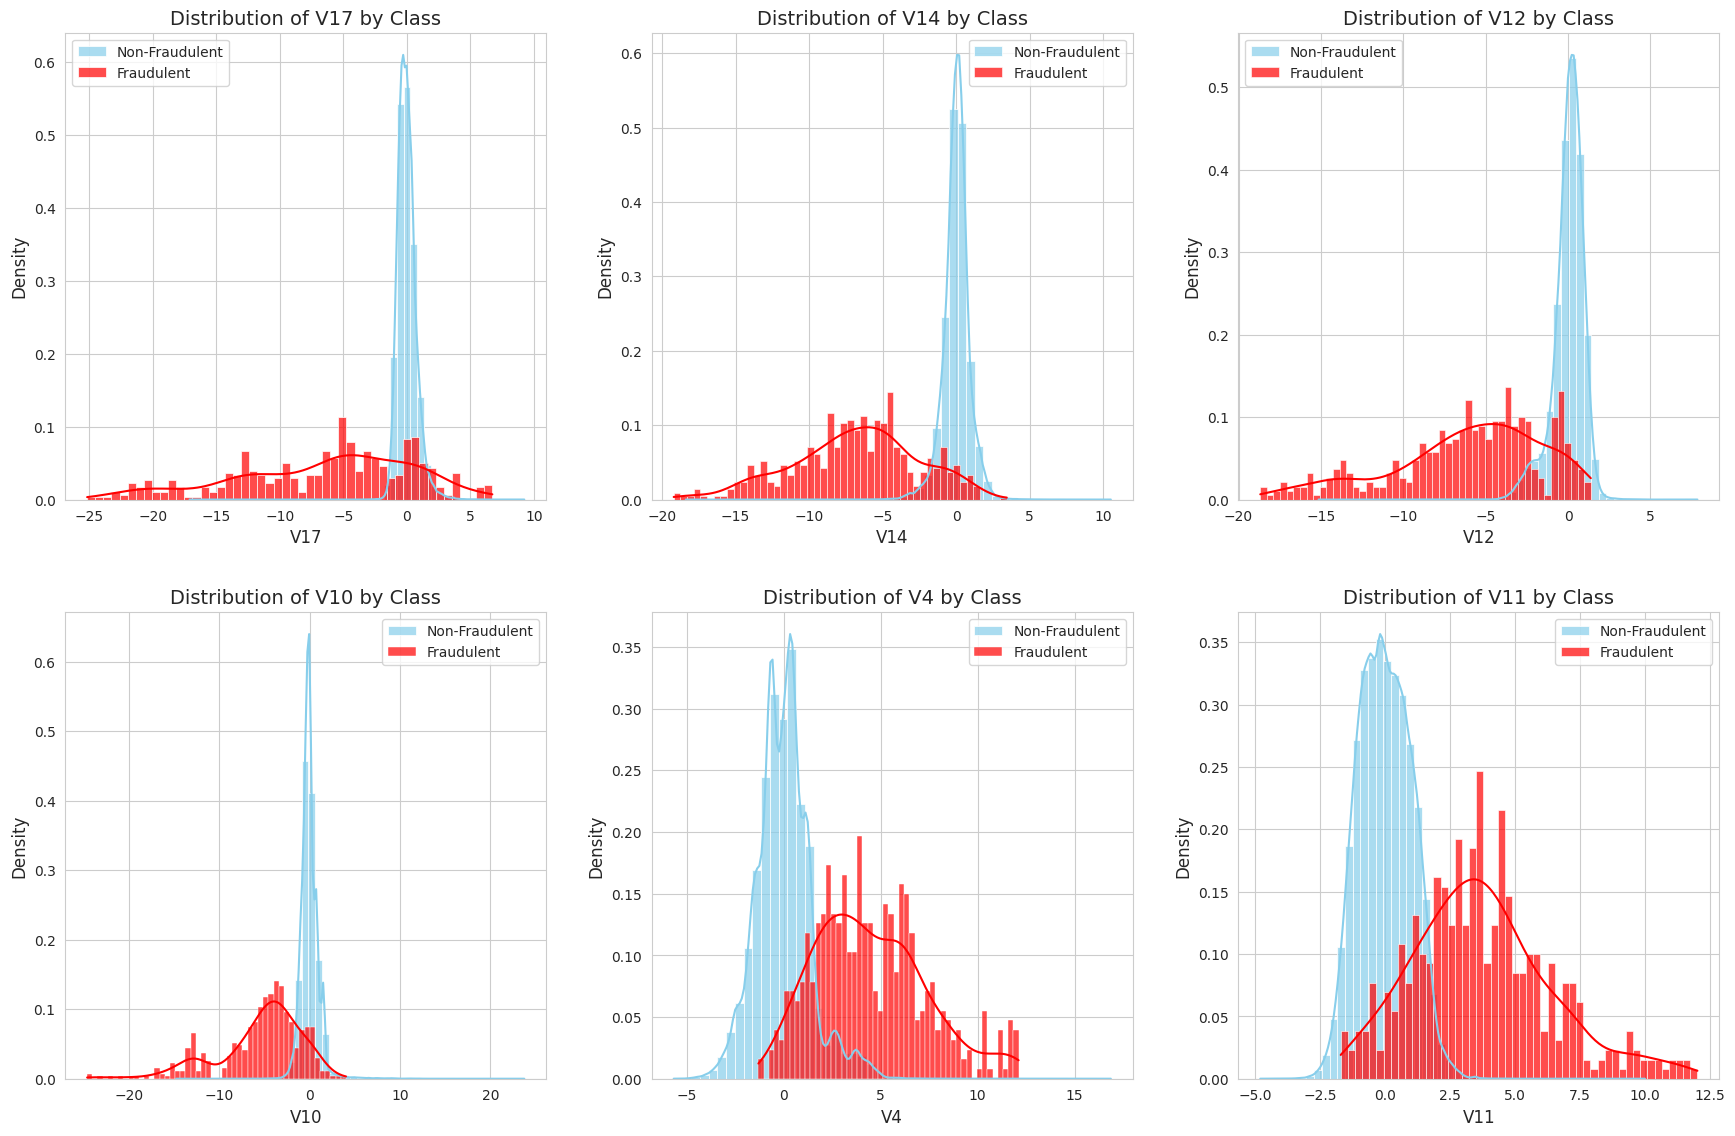

KeyError: "['scaled_amount', 'scaled_time'] not in index"

In [19]:
plt.figure(figsize=(18, 8))
sns.histplot(df[df['Class'] == 0]['Hour'], bins=48, kde=False, color='skyblue', alpha=0.7, label='Non-Fraudulent')
sns.histplot(df[df['Class'] == 1]['Hour'], bins=48, kde=False, color='red', alpha=0.7, label='Fraudulent')
plt.title('Transaction Volume by Hour of Day (Fraud vs. Non-Fraud)', fontsize=16)
plt.xlabel('Hour of Day (0-47)', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.xticks(np.arange(0, 49, 2), fontsize=10) # Show every 2 hours for better readability
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Anomaly Detection:

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x='Class', y='Amount', data=df, showfliers=False, palette='coolwarm')
plt.title('Transaction Amount Distribution by Class (Original Scale)', fontsize=14)
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)', fontsize=12)
plt.ylabel('Transaction Amount', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(1, 2, 2)

plt.title('Scaled Transaction Amount Distribution by Class', fontsize=14)
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)', fontsize=12)
plt.ylabel('Scaled Transaction Amount', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Insight:
# --- Patterns in V-features related to Class ---
important_v_features = ['V17', 'V14', 'V12', 'V10', 'V4', 'V11']

plt.figure(figsize=(18, 12))
for i, feature in enumerate(important_v_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[df['Class'] == 0][feature], bins=50, kde=True, color='skyblue', label='Non-Fraudulent', stat='density', common_norm=False, alpha=0.7)
    sns.histplot(df[df['Class'] == 1][feature], bins=50, kde=True, color='red', label='Fraudulent', stat='density', common_norm=False, alpha=0.7)
    plt.title(f'Distribution of {feature} by Class', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=10)
plt.tight_layout(pad=3.0)
plt.show()

# --- Trend Analysis:

df_corr = df[['scaled_amount', 'scaled_time', 'Hour'] + [f'V{i}' for i in range(1, 29)] + ['Class']]

plt.figure(figsize=(22, 16))
sns.heatmap(df_corr.corr(), cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5, linecolor='lightgray', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Features and Class', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


# **7.Handling outliers and data transformations**



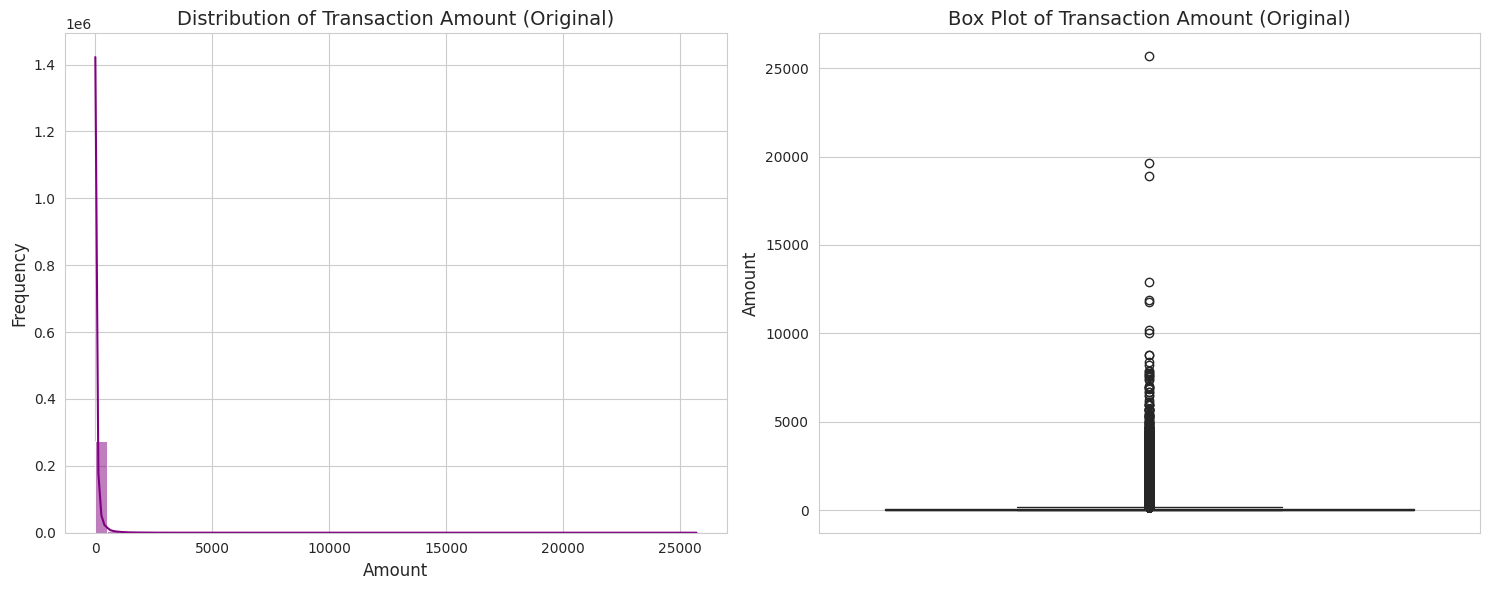


'Amount' and 'Time' features have been successfully scaled using RobustScaler.


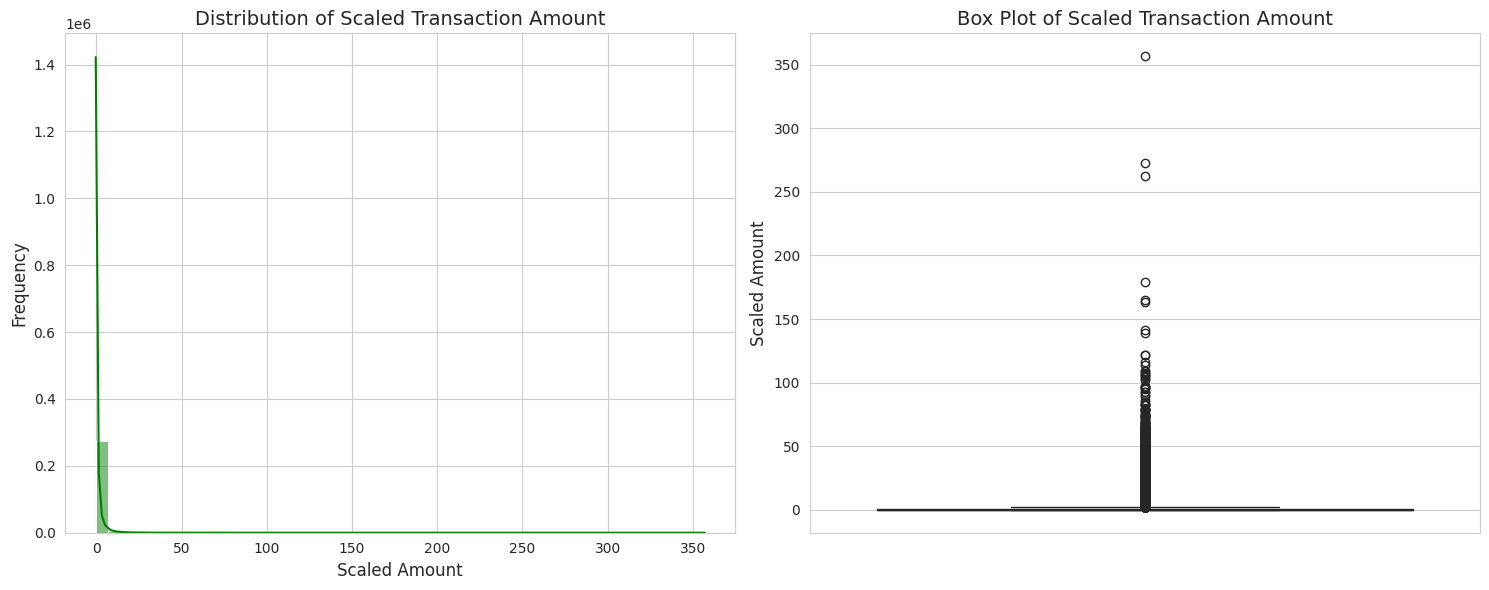

In [20]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Amount'], bins=50, kde=True, color='purple')
plt.title('Distribution of Transaction Amount (Original)', fontsize=14)
plt.xlabel('Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Amount'], color='purple')
plt.title('Box Plot of Transaction Amount (Original)', fontsize=14)
plt.ylabel('Amount', fontsize=12)
plt.tight_layout()
plt.show()

robust_scaler = RobustScaler()

# Reshape the data for fit_transform as it expects a 2D array
df['scaled_amount'] = robust_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = robust_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

print("\n'Amount' and 'Time' features have been successfully scaled using RobustScaler.")

# Visualize 'Amount' distribution after transformation to see the effect of scaling
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['scaled_amount'], bins=50, kde=True, color='green')
plt.title('Distribution of Scaled Transaction Amount', fontsize=14)
plt.xlabel('Scaled Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(y=df['scaled_amount'], color='green')
plt.title('Box Plot of Scaled Transaction Amount', fontsize=14)
plt.ylabel('Scaled Amount', fontsize=12)
plt.tight_layout()
plt.show()


8.Initial visual representation of key findings

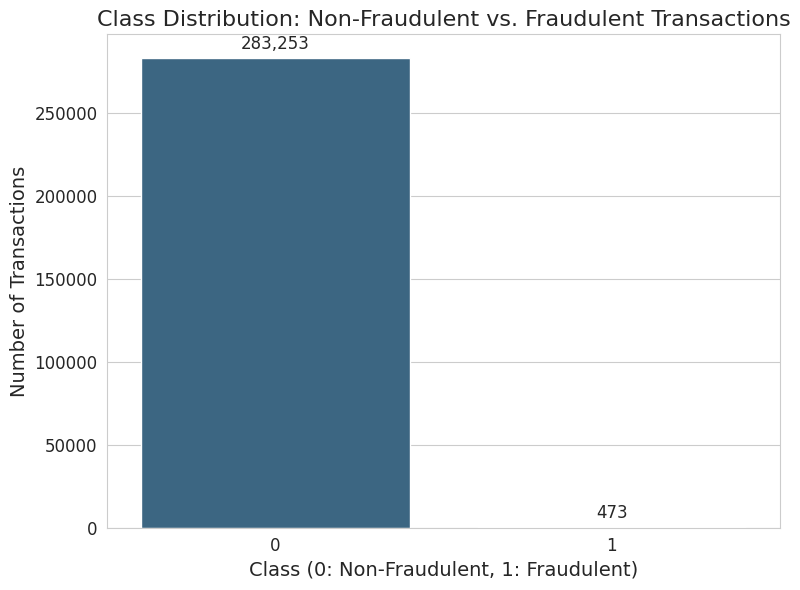

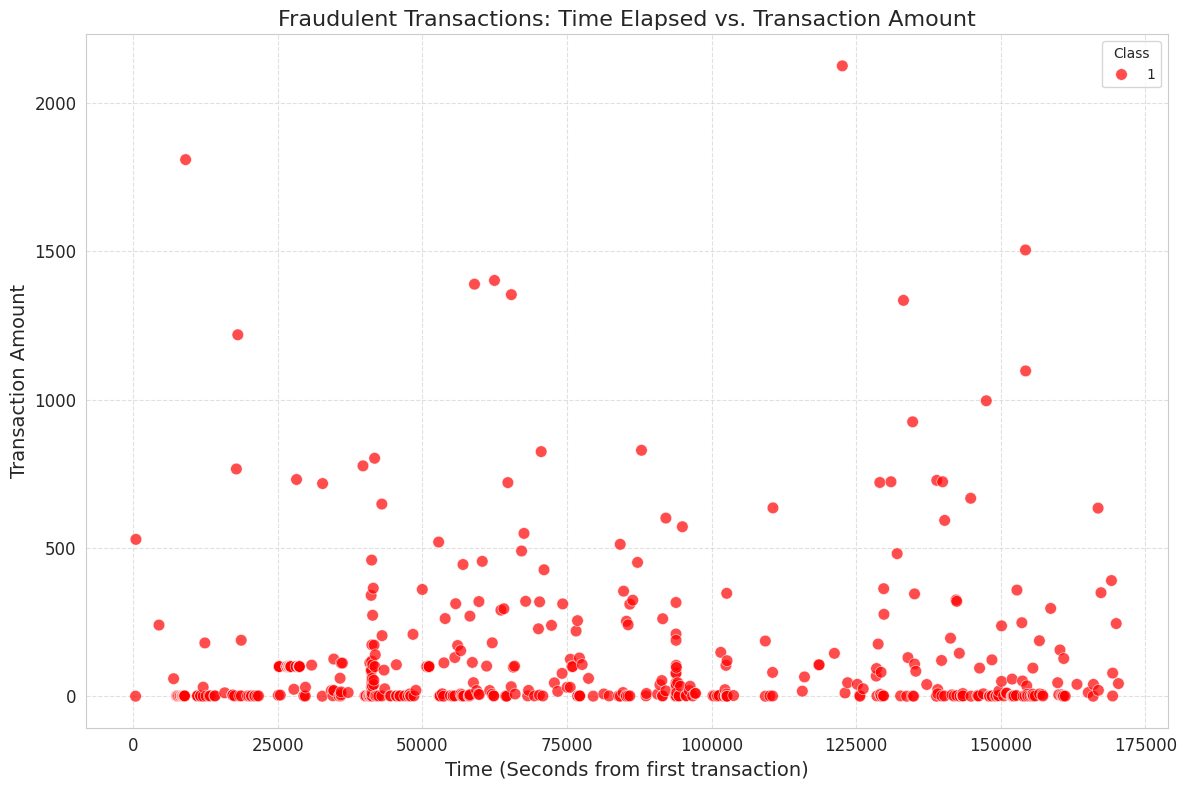

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df, palette='viridis')
plt.title('Class Distribution: Non-Fraudulent vs. Fraudulent Transactions', fontsize=16)
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Annotate bars with counts
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
# Filter for only fraudulent transactions (Class == 1)
sns.scatterplot(x='Time', y='Amount', data=df[df['Class'] == 1],
                hue='Class', palette=['red'], s=70, alpha=0.7, edgecolor='w', linewidth=0.5)
plt.title('Fraudulent Transactions: Time Elapsed vs. Transaction Amount', fontsize=16)
plt.xlabel('Time (Seconds from first transaction)', fontsize=14)
plt.ylabel('Transaction Amount', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()